In [3]:
import numpy as np
import pylab as plt
from math import pi, sin, cos

In [4]:
N = 2000
a = np.array([cos(2.*pi*t / 210) for t in range(N)])

In [5]:
def mfft(a ,draw=False):
    plt.rcParams['axes.grid'] = True
    plt.tight_layout()
    A = np.fft.rfft(a)
    if (draw):
        plt.rcParams['axes.grid'] = True
        fig, ax = plt.subplots(2, figsize=(6,4), dpi=150)
        plt.tight_layout()
        n = np.arange(len(a))
        
        ax[0].plot(n, a, '.-')
        ax[0].set_title('$a[n]$')
        ax[1].set_xlim(0, 170)
        ax[1].set_title('$A$')
        #ax[1].plot(n[0 : (N // 2 + 1)], A.real, '-', label='real')
        #ax[1].plot(n[0 : (N // 2 + 1)], A.imag, '-', label='imag')
        ax[1].plot(n[0 : (N // 2 + 1)], np.abs(A), '-')
        #ax[1].legend(loc=2, bbox_to_anchor=(1, 1))
        
    return np.abs(A)

<Figure size 432x288 with 0 Axes>

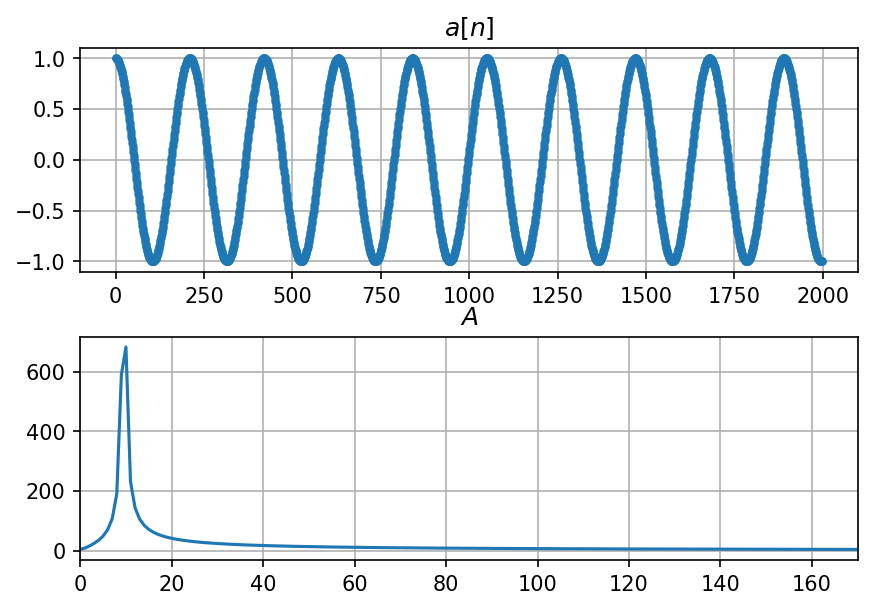

In [6]:
A = mfft(a, True)

In [7]:
np.argmax(A)

10

In [64]:
def linefft(a, sliceSize, num = -1, draw = True):
    if (num == -1):
        num = np.argmax(mfft(a[0:sliceSize]))
    ans = []
    
    for i in range(0, len(a) - sliceSize):
        ans.append(mfft(a[i:i + sliceSize])[num])
    
    Ans = np.array(ans)
    if (draw):
        fig, ax = plt.subplots(1, figsize=(6,4), dpi=150)
        n = np.arange(len(Ans))
        ax.plot(n, Ans, '.-')
        ax.set_title('$a[n]$')
    return Ans


0 5166.145707424818


<Figure size 432x288 with 0 Axes>

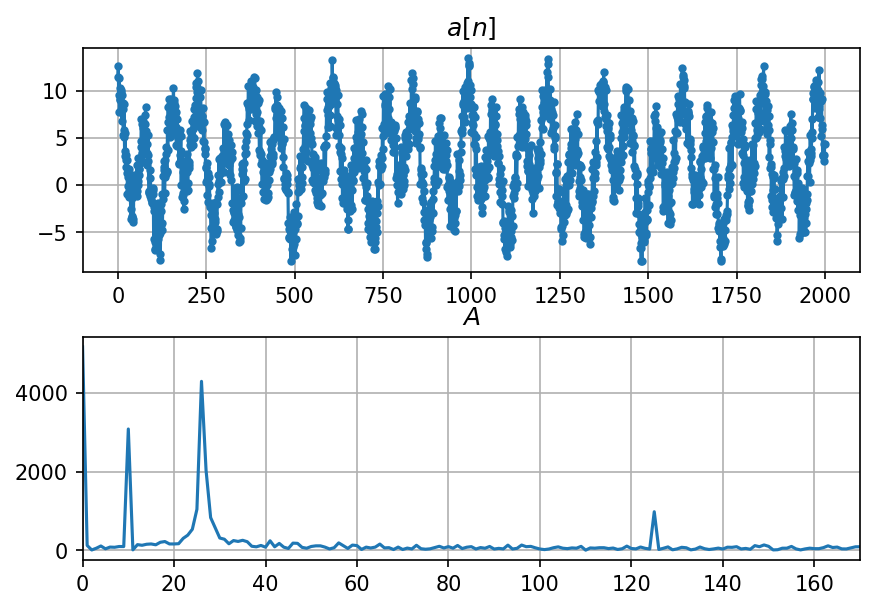

In [28]:
a1 = np.array([cos(2.*pi*t / 16) + 3 * cos(2.*pi*t / 200) + 5 * cos(2.*pi*t / 76) + 5 * np.random.random_sample() for t in range(N)])
an = mfft(a1, True)
print(np.argmax(an), np.max(an))